# Homework 3 Exploratory Data Analysis and Data Preparation
**Date** 26/11/2024

## Table of Contents
1. <a href="#exploratory-data-analysis">Exploratory Data Analysis</a>
    - <a href="#iris-data">1.1 IRIS Data</a>
        - <a href="#relationship-between-sepal-and-petal-dimensions">1.1.1 Relationship between Sepal and Petal Dimensions</a>
        - <a href="#distribution-of-sepal-and-petal-dimensions">1.1.2 Distribution of Sepal and Petal Dimensions</a>
        - <a href="#pair-plot-analysis">1.1.3 Pair Plot Analysis</a>
    - <a href="#birdwatching">1.2 Birdwatching</a>
        - <a href="#most-prevalent-species">1.2.1 Most Prevalent Species</a>
        - <a href="#monthly-distribution-of-top-3-most-prevalent-species">1.2.2 Monthly Distribution of Top 3 Most Prevalent Species</a>
        - <a href="#rarest-species">1.2.3 Rarest Species</a>
        - <a href="#additional-explorations">1.2.4 Additional Explorations</a>
            - <a href="#question-1-how-does-birdwatching-activity-vary-within-a-single-day-hour-by-hour">1.2.4.1 Question 1: How does birdwatching activity vary within a single day (hour-by-hour)?</a>
            - <a href="#question-2-are-certain-days-of-the-week-more-common-for-birdwatching">1.2.4.2 Question 2: Are certain days of the week more common for birdwatching?</a>
            - <a href="#question-3-how-are-the-bird-sightings-distributed-across-the-different-municipalities">1.2.4.3 Question 3: How are the bird sightings distributed across the different municipalities?</a>
    - <a href="#predicting-strokes">1.3 Predicting Strokes</a>
        - <a href="#dataset-overview">1.3.1 Dataset Overview</a>
        - <a href="#exploratory-questions">1.3.2 Exploratory Questions</a>
            - <a href="#question-1-is-there-a-relationship-between-age-and-the-likelihood-of-having-a-stroke">1.3.2.1 Question 1: Is there a relationship between age and the likelihood of having a stroke?</a>
            - <a href="#question-2-how-does-hypertension-affect-stroke-incidence">1.3.2.2 Question 2: How does hypertension affect stroke incidence?</a>
            - <a href="#question-3-is-there-a-difference-in-stroke-incidence-between-males-and-females">1.3.2.3 Question 3: Is there a difference in stroke incidence between males and females?</a>

2. <a href="#data-preparation">Data Preparation</a>
    - <a href="#cleaning-cell-phone-usage-data">2.1 Cleaning Cell Phone Usage Data</a>
        - <a href="#loading-the-dataset">2.1.1 Loading the dataset</a>
        - <a href="#converting-strings-to-numbers">2.1.2 Converting Strings to Numbers</a>
        - <a href="#dealing-with-missing-values">2.1.3 Dealing with missing values</a>
        - <a href="#final-prepared-data">2.1.3 Final Prepared Data</a>
---

## <a id="exploratory-data-analysis">1. Exploratory Data Analysis</a>

### <a id="iris-data">1.1 IRIS Data</a>

The IRIS dataset contains measurements of iris flowers from three species: *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica*. The measurements include sepal length, sepal width, petal length, and petal width. Our task is to visualize the dataset and explore relationships between these measurements.

### <a id="relationship-between-sepal-and-petal-dimensions">1.1.1 Relationship between Sepal and Petal Dimensions</a>
We will determine if there is a relationship between sepal dimensions and petal dimensions.

**Code:**

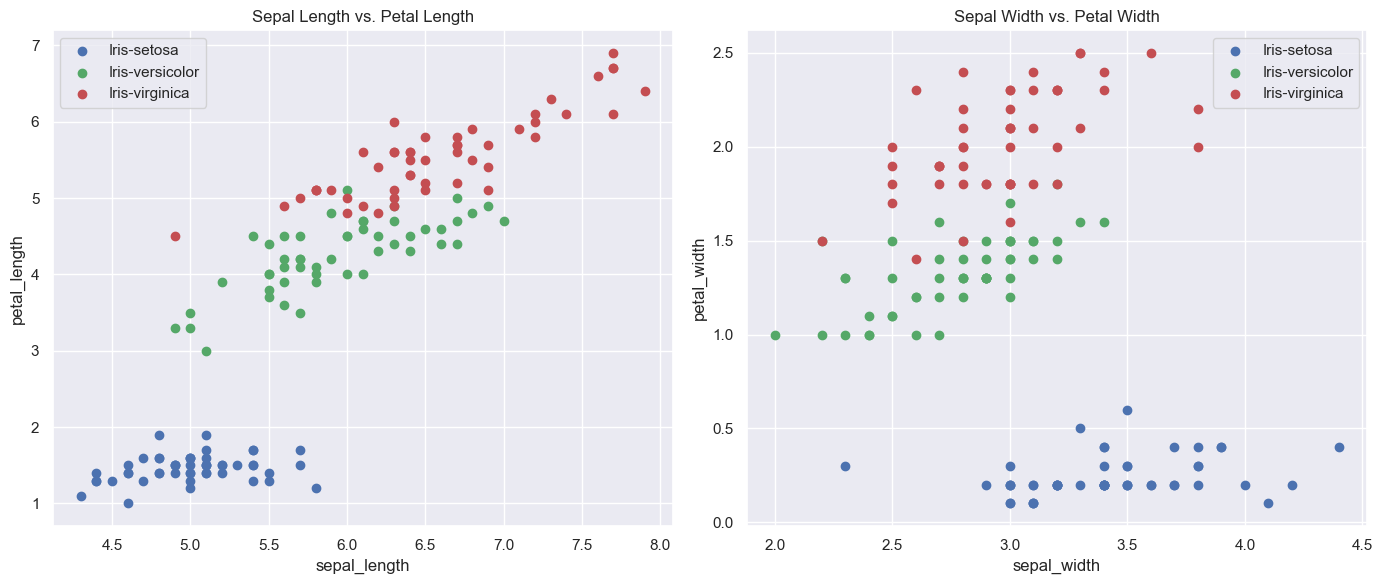

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load the dataset
iris_df = pd.read_csv('IRIS.csv')

# Set Seaborn style for the background
sns.set(style="darkgrid") 

# Create a color mapping for species
species_colors = {
    'Iris-setosa': '#4C72B0',     # Blue shade
    'Iris-versicolor': '#55A868', # Green shade
    'Iris-virginica': '#C44E52'   # Red shade
}

# Create scatter plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Sepal Length vs. Petal Length
for species, color in species_colors.items():
    subset = iris_df[iris_df['species'] == species]
    axes[0].scatter(subset['sepal_length'], subset['petal_length'], label=species, color=color)
axes[0].set_xlabel('sepal_length')
axes[0].set_ylabel('petal_length')
axes[0].set_title('Sepal Length vs. Petal Length')
axes[0].legend()

# Right plot: Sepal Width vs. Petal Width
for species, color in species_colors.items():
    subset = iris_df[iris_df['species'] == species]
    axes[1].scatter(subset['sepal_width'], subset['petal_width'], label=species, color=color)
axes[1].set_xlabel('sepal_width')
axes[1].set_ylabel('petal_width')
axes[1].set_title('Sepal Width vs. Petal Width')
axes[1].legend()

plt.tight_layout()
plt.show()


**Analysis:**    
1. **Sepal Length vs. Petal Length (Left Plot):**
   - A strong positive correlation exists, particularly for the Iris-versicolor and Iris-virginica species, where longer sepals are associated with longer petals.
   - Iris-setosa shows very little variation in petal length, and its data points are distinct from the other two species, forming a cluster with lower petal length values.

2. **Sepal Width vs. Petal Width (Right Plot):**
   - The relationship between sepal width and petal width is less pronounced compared to the left plot.
   - Iris-setosa has smaller petal widths and relatively larger sepal widths, forming a clear cluster.
   - Iris-versicolor and Iris-virginica overlap somewhat but show a general trend where wider petals correspond to wider sepals.

**Conclusion:**    
- There is a noticeable relationship between sepal and petal dimensions, particularly for sepal length vs. petal length. Iris-setosa is distinct, while Iris-versicolor and Iris-virginica exhibit correlation between the sepal and petal dimensions.

#### <a id="distribution-of-sepal-and-petal-dimensions">1.1.2 Distribution of Sepal and Petal Dimensions</a>
We will investigate how are the sepal and petal dimensions distributed.

**Code:**

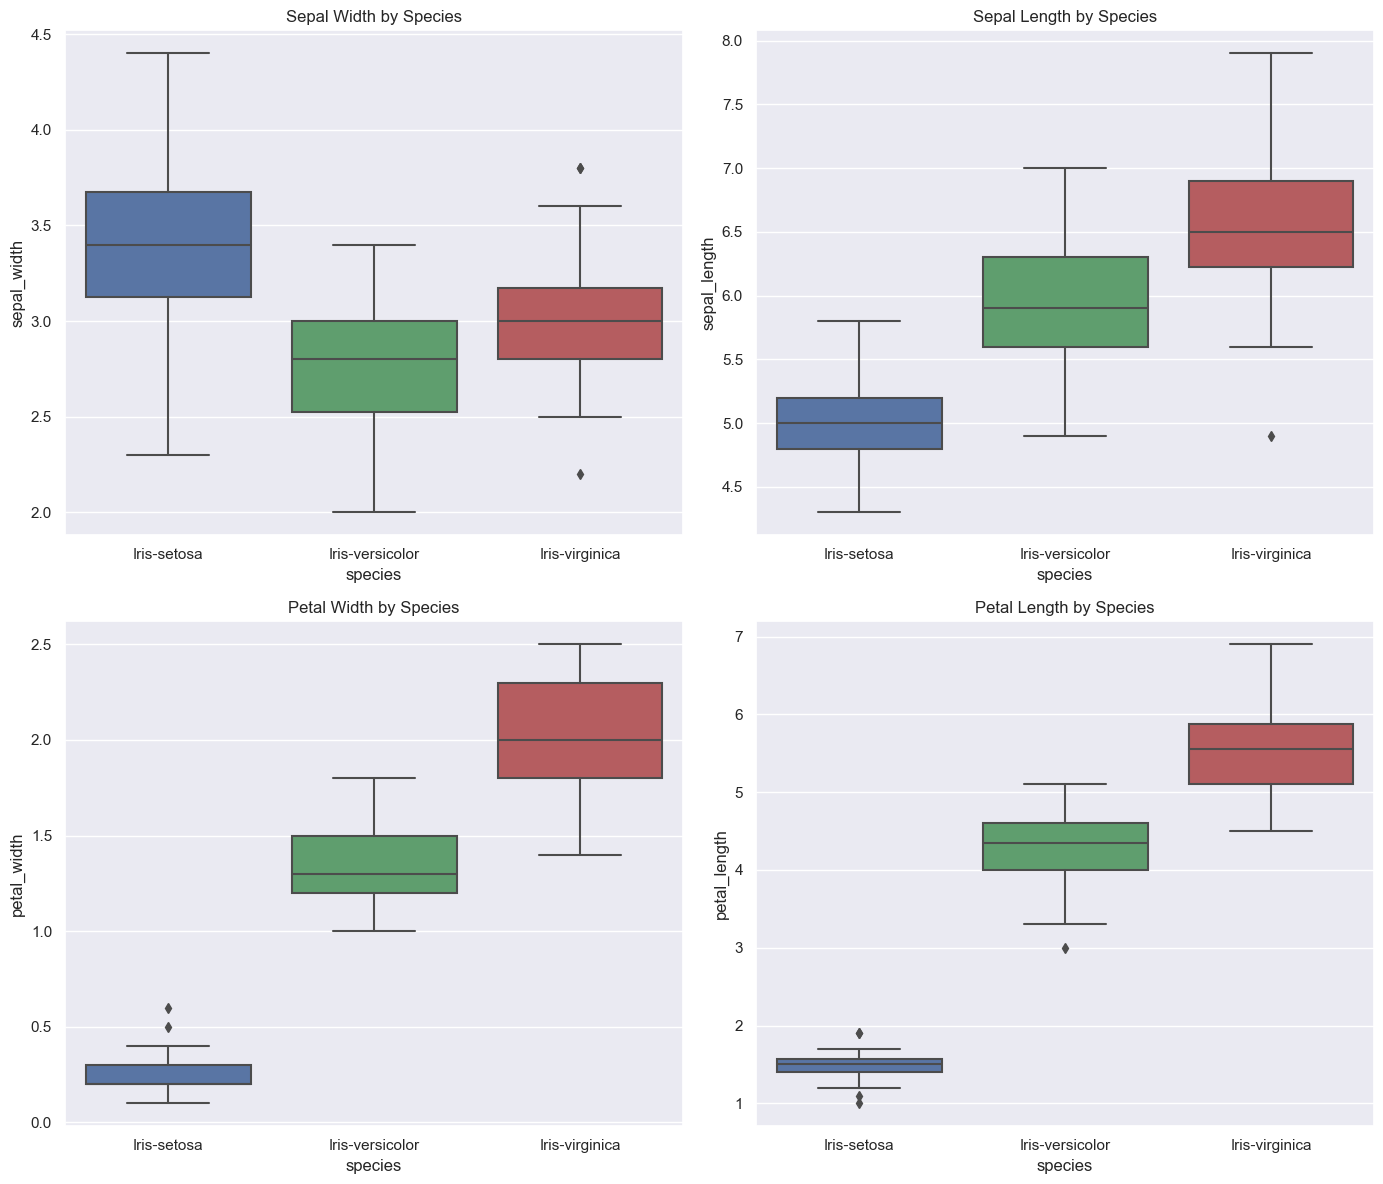

In [2]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Top-Left: Sepal Width by Species
sns.boxplot(x='species', y='sepal_width', data=iris_df, palette=species_colors, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Width by Species')

# Top-Right: Sepal Length by Species
sns.boxplot(x='species', y='sepal_length', data=iris_df, palette=species_colors, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Length by Species')

# Bottom-Left: Petal Width by Species
sns.boxplot(x='species', y='petal_width', data=iris_df, palette=species_colors, ax=axes[1, 0])
axes[1, 0].set_title('Petal Width by Species')

# Bottom-Right: Petal Length by Species
sns.boxplot(x='species', y='petal_length', data=iris_df, palette=species_colors, ax=axes[1, 1])
axes[1, 1].set_title('Petal Length by Species')

plt.tight_layout()
plt.show()

**Analysis:**

**Sepal Dimensions**
1. **Sepal Width**:
   - Iris-setosa tends to have the widest sepals, with a median around 3.4 cm and minimal overlap with the other species.
   - Iris-versicolor and Iris-virginica have narrower sepals, with their distributions overlapping slightly.
   
2. **Sepal Length**:
   - Iris-virginica has the longest sepals, followed by Iris-versicolor, and Iris-setosa has the shortest sepals. 
   - There is clear separation in median values, particularly between Iris-setosa and the other species.

**Petal Dimensions**
1. **Petal Width**:
   - Iris-virginica has the widest petals, with the range and median significantly larger than the other species.
   - Iris-setosa has the narrowest petals, with no overlap with the other species.
   
2. **Petal Length**:
   - Similar to petal width, Iris-virginica exhibits the longest petals, followed by Iris-versicolor, and Iris-setosa has much shorter petals.

**Conclusion**:
- Iris-setosa is clearly distinct based on both petal and sepal dimensions, showing no overlap with the other two species for several features.
- Iris-versicolor and Iris-virginica show some overlap, particularly in sepal dimensions, but in petal dimensions they are are more distinct.

#### <a id="pair-plot-analysis">1.1.3 Pair Plot Analysis</a>
We will analyze relationships between all pairs of variables . 

**Code:**

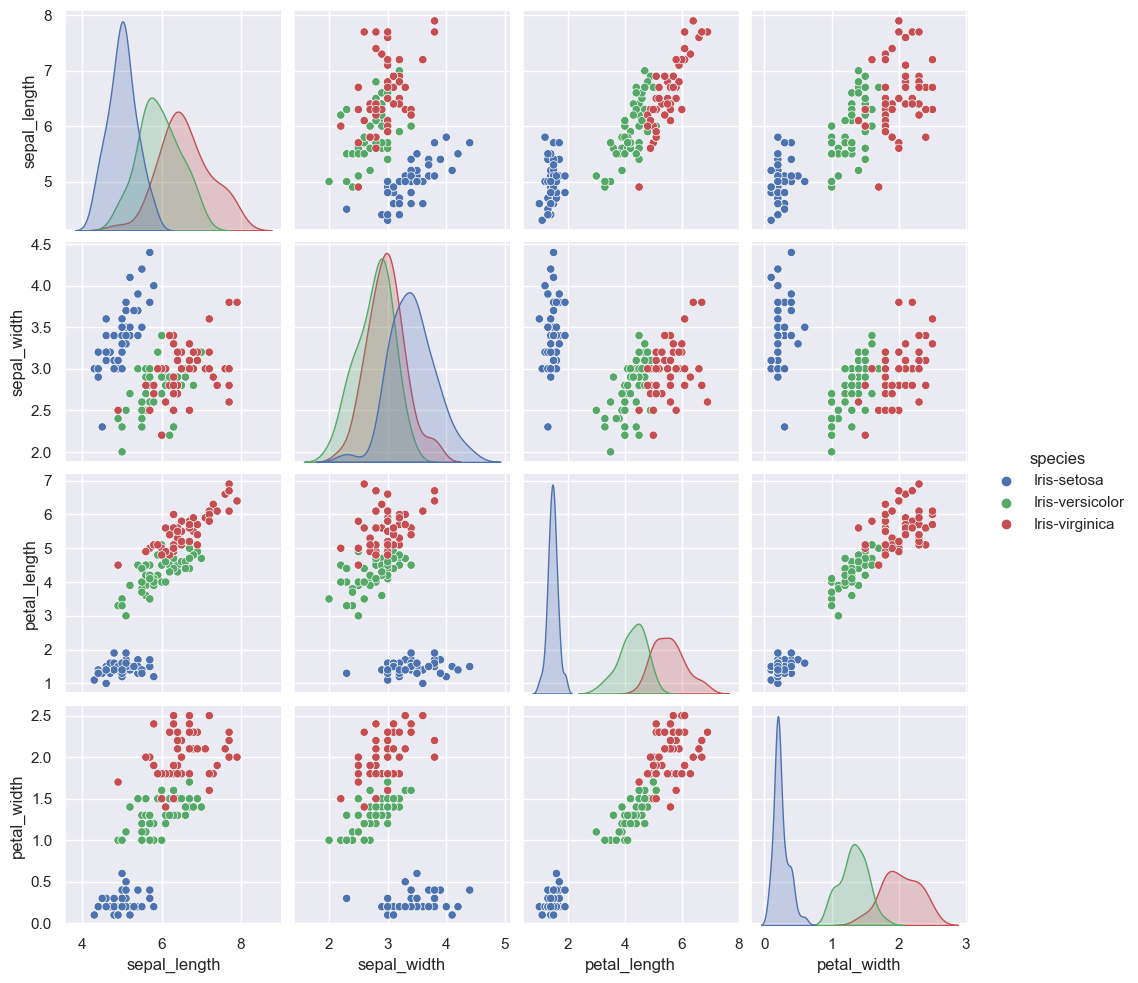

In [3]:
# Suppress all warnings 
warnings.filterwarnings("ignore")

# Create a pair plot
sns.pairplot(iris_df, hue='species', palette=species_colors)
plt.show()


**Analysis:**

The scatterplot matrix visualizes relationships between four variables of the Iris dataset: **sepal length**, **sepal width**, **petal length**, and **petal width**, categorized by species (**Iris-setosa**, **Iris-versicolor**, **Iris-virginica**).

- **Sepal Length and Sepal Width**: Generally show a weak negative correlation, with some overlap in species distribution.  
- **Sepal Length and Petal Length/Petal Width**: Display a clear positive correlation, indicating that longer sepals tend to be associated with longer and wider petals.  
- **Sepal Width and Petal Length/Petal Width**: Show little to no clear correlation, as sepal width does not appear to directly influence petal dimensions.  
- **Petal Length and Petal Width**: Exhibit a strong positive correlation, suggesting that flowers with longer petals also tend to have wider petals.

---

### <a id="birdwatching">1.2 Birdwatching</a> 
The dataset features bird sightings recorded from the beginning of 2022 through early June in the Royal National Park, with data sourced from Artportalen. The main objective is to explore and analyze this dataset to answer predefined questions, develop new inquiries, and derive valuable insights. The analysis begins with loading and examining the data.

**Code:**

In [4]:
# Load the dataset
bird_df = pd.read_csv('artportalen.csv')

# Preview the dataset
bird_df.head()

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,...,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,...,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin


#### <a id="most-prevalent-species">1.2.1 Most Prevalent Species</a>
We will explore which species are most prevalent.

**Code:**

In [5]:
# Convert the 'Antal' column to numeric, coercing errors
bird_df['Antal'] = pd.to_numeric(bird_df['Antal'], errors='coerce')

# Calculate total number of birds seen per species
species_totals = bird_df.groupby('Artnamn')['Antal'].sum()

# Sort the species based on the total number of birds seen
species_totals_sorted = species_totals.sort_values(ascending=False)

# Get the top 10 most prevalent species

print("Top 10 Most Prevalent Species:")
species_totals_sorted.head(10)

Top 10 Most Prevalent Species:


Artnamn
Grönsiska        20211.0
Sothöna           8308.0
Gräsand           7167.0
Storskrake        6750.0
Vitkindad gås     6345.0
Storskarv         5281.0
Björktrast        3173.0
Koltrast          2750.0
Vigg              2375.0
Skrattmås         2326.0
Name: Antal, dtype: float64

**Analysis:**

The top 10 most prevalent bird species are led by Grönsiska with 20,211 individuals, followed by Sothöna and Gräsand with 8,308 and 7,167 respectively.

#### <a id="monthly-distribution-of-top-3-most-prevalent-species">1.2.2 Monthly Distribution of Top 3 Most Prevalent Species</a>

We will explore the monthly distribution of the top 3 most prevalent species (with 'startdatum').

**Code:**

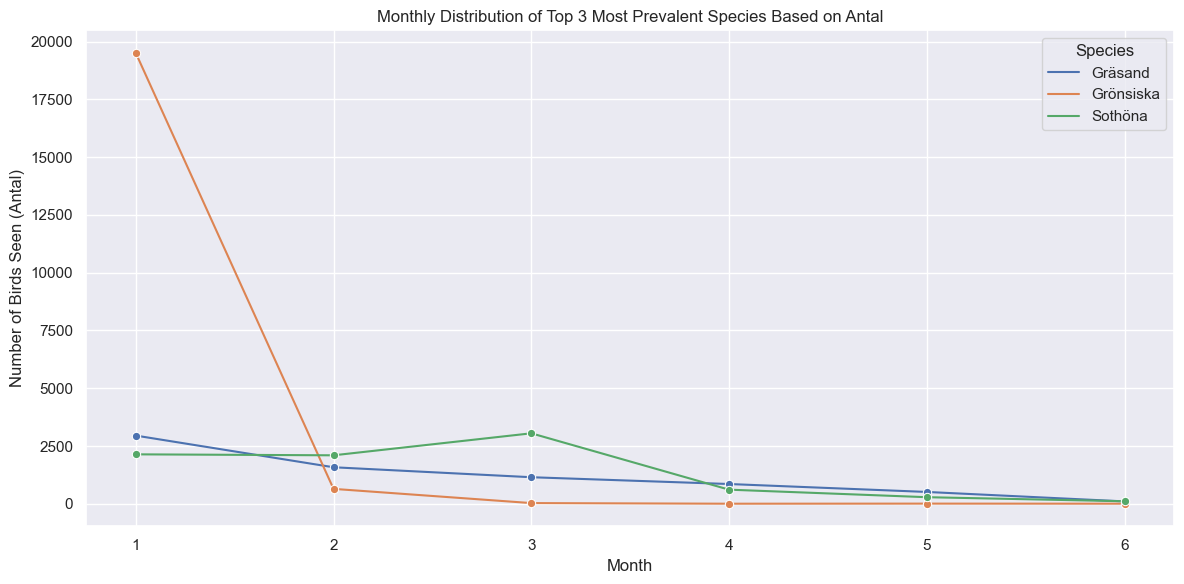

In [6]:
# Get the top 3 most prevalent species
top_3_species = species_totals_sorted.head(3).index.tolist()

# Filter data for top 3 species
top_3_data = bird_df[bird_df['Artnamn'].isin(top_3_species)].copy()

# Convert 'Startdatum' column to datetime 
top_3_data['Startdatum'] = pd.to_datetime(top_3_data['Startdatum'], errors='coerce')

# Extract month from the date
top_3_data['Month'] = top_3_data['Startdatum'].dt.month

# Group by species ('Artnamn') and month, summing the 'Antal'
monthly_counts = top_3_data.groupby(['Artnamn', 'Month'])['Antal'].sum().reset_index(name='Counts')

# Plot the monthly distribution
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='Month', y='Counts', hue='Artnamn', marker='o')
plt.title('Monthly Distribution of Top 3 Most Prevalent Species Based on Antal')
plt.xlabel('Month')
plt.ylabel('Number of Birds Seen (Antal)')
plt.xticks(range(1, 7))  # Ensure x-axis shows months 1 to 12
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()
plt.show()


**Analysis:**

1. **Grönsiska (orange line):** Sightings start very high in January, drop dramatically in February, and continue at low levels through the remaining months.
2. **Gräsand (blue line):** Sightings remain relatively steady across all months, with slight fluctuations but no significant peaks or drops.
3. **Sothöna (green line):** Sightings are low in January, gradually increase through March, peak slightly, and then decline steadily from April onwards.

**Overall:** January sees a significant concentration of Grönsiska sightings, while Gräsand and Sothöna show more consistent patterns, with slight peaks during early spring. Sightings for all species diminish towards the later months, likely as data collection winds down.

#### <a id="rarest-species">1.2.3 Rarest Species</a>

**Question:** What are the rarest species?

**Code:**

In [7]:
rarest_species = species_totals.sort_values(ascending=True)
print("Top 10 Rarest Species:")
rarest_species.head(20)

Top 10 Rarest Species:


Artnamn
Ob. korsnäbb                 0.0
Fjällvråk                    1.0
Lappsparv                    1.0
Varfågel                     1.0
Gravand                      1.0
Forsärla                     1.0
Tornfalk                     1.0
Spillkråka                   1.0
Trädlärka                    1.0
Ejder                        1.0
Ormvråk, underarten buteo    1.0
Rosenfink                    1.0
Storlom                      1.0
Bivråk                       1.0
Röd glada                    1.0
Strömstare                   1.0
Rödbena                      1.0
Bändelkorsnäbb               1.0
Ägretthäger                  1.0
Vinterhämpling               1.0
Name: Antal, dtype: float64

**Answer:**
The rarest species in the dataset is Ob. korsnäbb with zero sightings. There are also those with only a single recorded total "Antal". Several species fall into this category, each observed only once. These species represent the lowest frequency of sightings in the dataset.

#### <a id="additional-explorations">1.2.4 Additional Explorations</a>

**Question 1:** <a id="question-1-how-does-birdwatching-activity-vary-within-a-single-day-hour-by-hour">1.2.4.1 Question 1: How does birdwatching activity vary within a single day (hour-by-hour)?</a>

**Code:** 


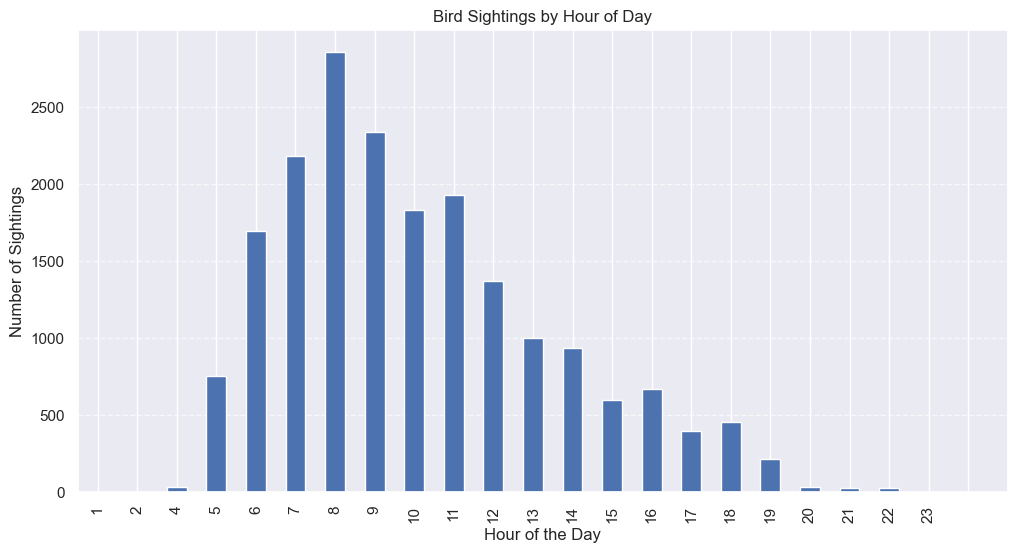

In [8]:
# Filter rows where 'Starttid' is not NaN
valid_time_data = bird_df.dropna(subset=['Starttid'])

# Convert 'Starttid' to datetime format (assuming it only contains time)
valid_time_data['Time'] = pd.to_datetime(valid_time_data['Starttid'], format='%H:%M', errors='coerce')

# Extract hour from the 'Time' column
valid_time_data['Hour'] = valid_time_data['Time'].dt.hour

# Count sightings by hour
hourly_counts = valid_time_data['Hour'].value_counts().sort_index()

# Plot sightings by hour
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Bird Sightings by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')
plt.xticks(range(0, 24))  # Ensure x-axis shows 0-23 hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Answer:**

- Birdwatching activity peaks in the morning hours (especially between 6 AM and 11 AM), with the highest number of sightings at 8-9 AM.
- Activity declines steadily after noon and becomes minimal in the evening and nighttime.
- The pattern might reflects bird behavior, such as increased activity during the morning for feeding and movement.
- The low activity in the early morning (before 6 AM) and evening (after 6 PM) could relate to bird inactivity or the preferences of birdwatchers themselves.

This suggests a mix of biological rhythms of birds and human activity patterns influencing the data.

**Question 2:** <a id="question-2-are-certain-days-of-the-week-more-common-for-birdwatching">1.2.4.2 Question 2: Are certain days of the week more common for birdwatching?</a>

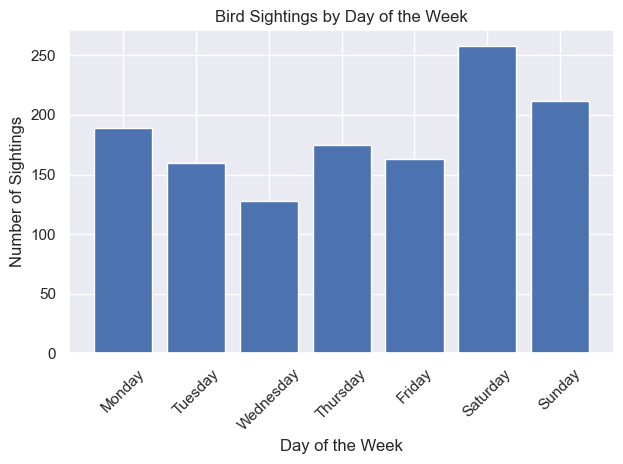

In [9]:
# Convert 'Startdatum' column to datetime 
bird_df['Startdatum'] = pd.to_datetime(top_3_data['Startdatum'])

# Extract day of the week from 'Startdatum'
bird_df['DayOfWeek'] = bird_df['Startdatum'].dt.day_name()

# Count sightings by day of the week
day_counts = bird_df['DayOfWeek'].value_counts()

# Sort by the order of days in a week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(days_order)

# Plotting
plt.bar(day_counts.index, day_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sightings')
plt.title('Bird Sightings by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Answer:** 
- **Saturday and Sunday** have the highest number of sightings, suggesting that weekends are the most popular times for birdwatching. This likely correlates with people's availability, as weekends typically provide more free time for outdoor activities.

- **Monday and Tuesday** also show relatively high numbers, but there is a noticeable dip in sightings mid-week (Wednesday and Friday).
 
**Insights to the Data:**
1. **Human Behavior Impact**: The trend strongly indicates that bird sightings are more closely linked to human activity patterns rather than fluctuations in bird behavior or population.

2. **Weekend Effect**: Weekends see a surge in birdwatching activity, which might be due to leisure time or organized birdwatching events.

3. **Potential Bias in Data**: The data likely reflects human availability for birdwatching rather than actual changes in bird populations or behaviors.

This emphasizes the need to account for human behavior when analyzing observational data to avoid misinterpreting natural trends.

**Question 3:** <a id="question-3-how-are-the-bird-sightings-distributed-across-the-different-municipalities">1.2.4.3 Question 3: How are the bird sightings distributed across the different municipalities?</a>

**Code:**

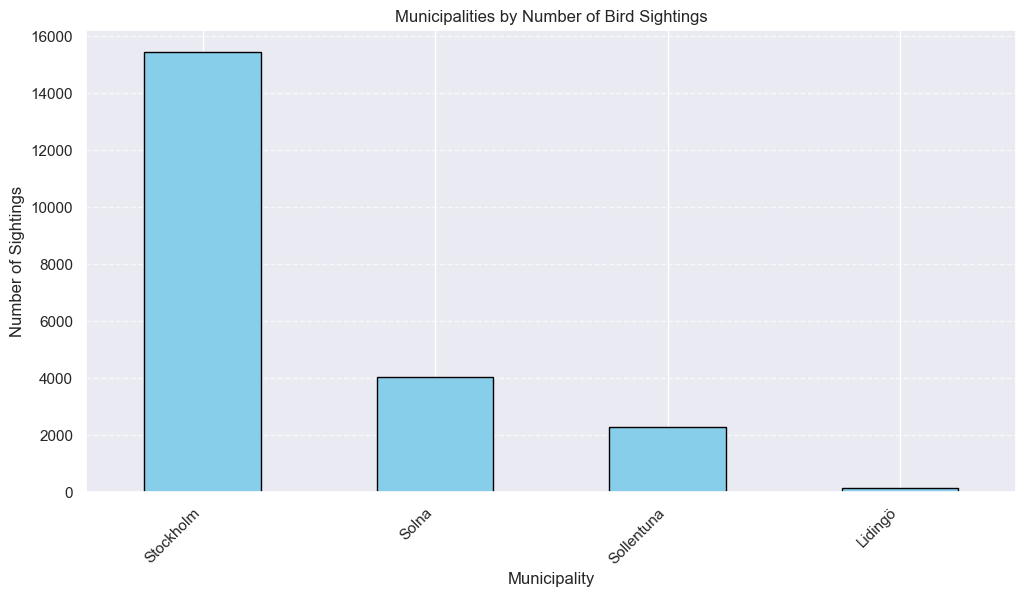

In [10]:
# Count the number of sightings in each Municipality
kommun_sightings = bird_df['Kommun'].value_counts()

#Visualize the distribution of sightings across municipalities
plt.figure(figsize=(12, 6))
kommun_sightings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Municipalities by Number of Bird Sightings')
plt.xlabel('Municipality')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Answer:**
**Answer:**  
Stockholm has a significantly higher number of bird sightings compared to Solna, Sollentuna, and Lidingö, with Lidingö recording the lowest.  

**Insights:**  
   - **Uneven Distribution:** The data is heavily skewed towards Stockholm, maybe due to higher birdwatcher activity, Stockholm comprising a larger portion of Royal National Park or bird distribution.

These findings suggest further investigation is needed to understand Stockholm's dominance.


---

### <a id="predicting-strokes">1.3 Predicting Strokes</a>
The data contains information about stroke cases and the individuals affected. The aim is to explore the dataset, examine its structure and variables, and address key questions to uncover meaningful insights about the factors associated with stroke occurrences.

#### <a id="dataset-overview">1.3.1 Dataset Overview</a>
We will explore the dataset to see the limitations of the data. 

**Code:**

In [11]:
# Load the dataset
stroke_df = pd.read_csv('stroke-data.csv')

# Preview the dataset
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


stroke
0    4861
1     249
Name: count, dtype: int64


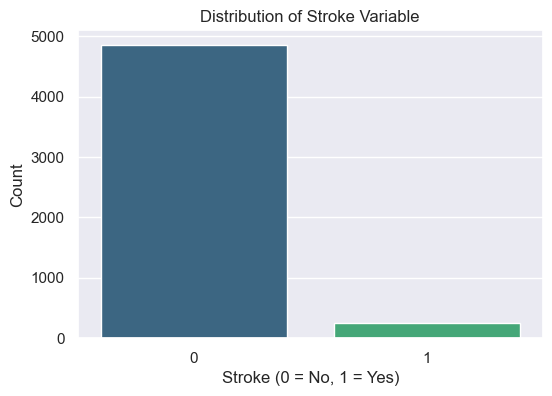

In [12]:
# Check the distribution of the target variable
stroke_counts = stroke_df['stroke'].value_counts()
print(stroke_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette='viridis')
plt.title("Distribution of Stroke Variable")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

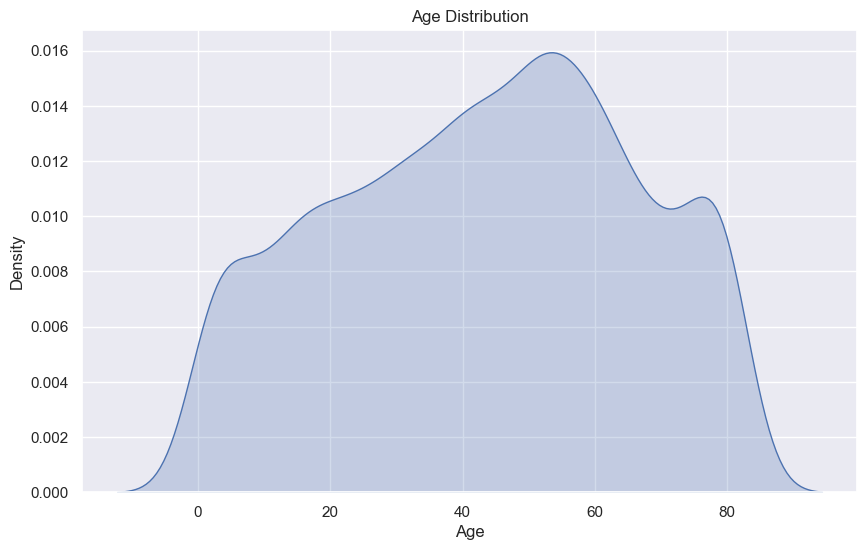

In [13]:
# Smooth representation of the age distribution using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(stroke_df['age'], shade=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [14]:
# Count and label
hypertension_summary = stroke_df['hypertension'].value_counts().rename(index={0: 'No Hypertension', 1: 'With Hypertension'})

# Display the labeled counts
print(hypertension_summary)

hypertension
No Hypertension      4612
With Hypertension     498
Name: count, dtype: int64


**Insights:**

We can see that the total number of people have had stroke is heavily unbalanced. We also see that the age distribution is also skewed for ages 40-60. We also see the number of people with no hypertension is much larger. This is important since we need to take into account when doing analysis, balancing weights of the different groups. 


#### <a id="exploratory-questions">1.3.2 Exploratory Questions</a>

**Question 1:** <a id="question-1-is-there-a-relationship-between-age-and-the-likelihood-of-having-a-stroke">1.3.2.1 Question 1: Is there a relationship between age and the likelihood of having a stroke?</a>

We present a suitable diagram which weighs the inbalance in the number of people who've had strokes. 

**Code:**


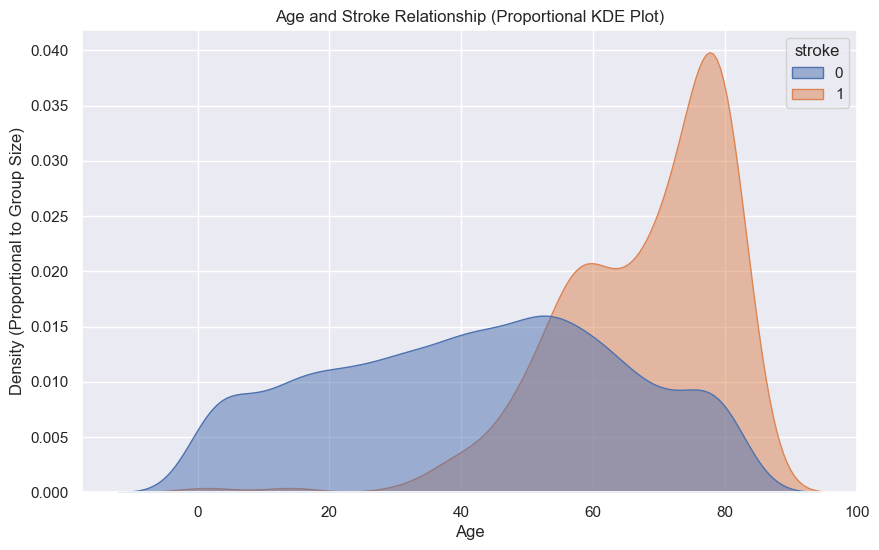

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class frequencies
stroke_counts = stroke_df['stroke'].value_counts()

# Add weights column to handle imbalance
# Weight formula: 1 / class frequency
stroke_df['weights'] = stroke_df['stroke'].apply(lambda x: 1 / stroke_counts[x])

# Plot the KDE with updated weights
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=stroke_df,
    x='age',
    hue='stroke',
    fill=True,
    alpha=0.5,
    common_norm=False,  # Prevent normalizing across both groups
    weights=stroke_df['weights']  # Use the recalculated weights
)
plt.title('Age and Stroke Relationship (Proportional KDE Plot)')
plt.xlabel('Age')
plt.ylabel('Density (Proportional to Group Size)')
plt.show()



**Answer:**

There is a clear relationship between age and the likelihood of having a stroke. As age increases, the stroke rate also rises significantly.

1. **<18 and 18-35**: The stroke rate almost almost nonexistent.
2. **36-50**: A slight increase in stroke rate is visible compared to the younger groups.
3. **51-65**: A notable jump in stroke rate is observed, indicating a higher risk for this age group.
4. **66-80**: The stroke rate continues to increase steeply.
5. **>80**: Stroke rates sharply decrease as the nubmer of individuals in our data tend towards zero. 

This data demonstrates a positive correlation between age and the likelihood of having a stroke. The blue density tells us about the people who have no stroke. 

**Question 2:** <a id="question-2-how-does-hypertension-affect-stroke-incidence">1.3.2.2 Question 2: How does hypertension affect stroke incidence?</a>

We here take into account for the fact that there are more people who don't have hypertension to present a suitable diagram.

**Code:**


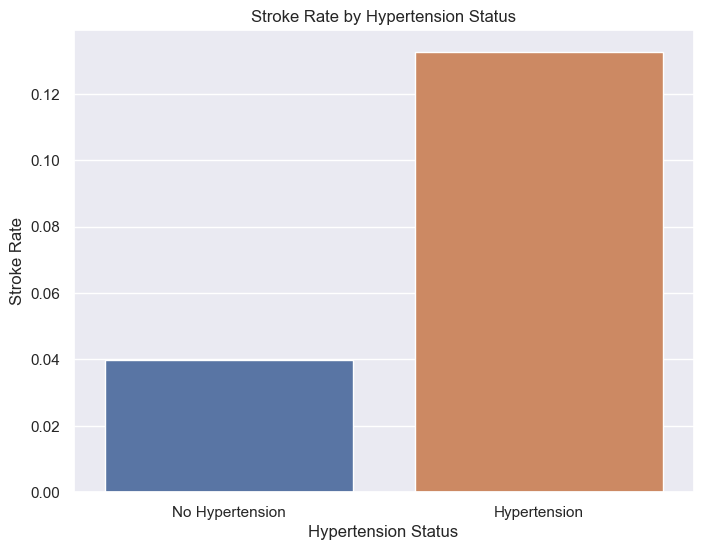

In [16]:
# Calculate stroke rates by hypertension status
htn_stroke = stroke_df.groupby('hypertension')['stroke'].mean().reset_index(name='Stroke_Rate')

# Map hypertension status to labels
htn_stroke['Hypertension'] = htn_stroke['hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'})

# Plot stroke rate by hypertension status
plt.figure(figsize=(8, 6))
sns.barplot(data=htn_stroke, x='Hypertension', y='Stroke_Rate')
plt.title('Stroke Rate by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Stroke Rate')
plt.show()



**Answer:**

Individuals with hypertension have a significantly higher stroke rate compared to those without hypertension, indicating hypertension is a critical risk factor.

**Question 3:** <a id="question-3-is-there-a-difference-in-stroke-incidence-between-males-and-females">1.3.2.3 Question 3: Is there a difference in stroke incidence between males and females?</a>

**Code:**

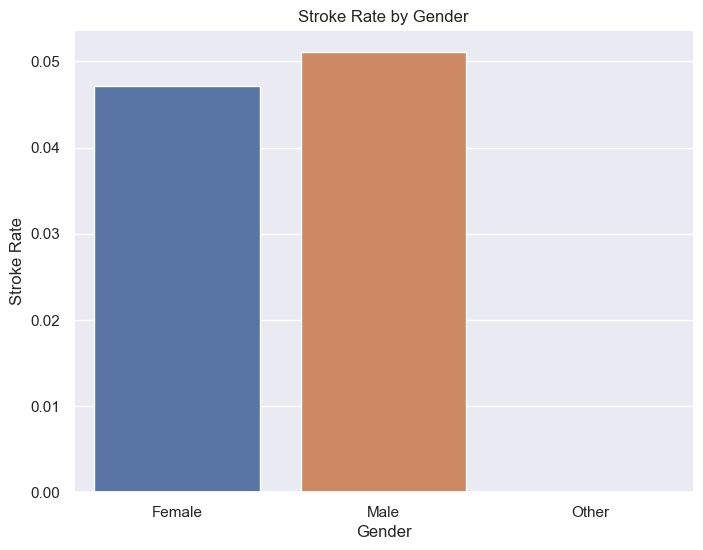

In [17]:
# Calculate stroke rates by gender
gender_stroke = stroke_df.groupby('gender')['stroke'].mean().reset_index(name='Stroke_Rate')

# Plot stroke rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_stroke, x='gender', y='Stroke_Rate')
plt.title('Stroke Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Stroke Rate')
plt.show()


**Answer:**

The stroke rates between males and females are similar, suggesting gender alone may not be a significant determinant of stroke risk in this dataset.

---

## <a id="data-preparation">2. Data Preparation</a>

### <a id="cleaning-cell-phone-usage-data">2.1 Cleaning Cell Phone Usage Data</a>

The`cell_phones_total.csv` contains data on the number of cell phones within countries from 1960 to 2019. Some numbers are represented as strings with abbreviations (k, M, B), and the dataset contains missing values. We will clean the dataset by handling missing values and converting all relevant cells to numeric values.

#### <a id="loading-the-dataset">2.1.1 Loading the dataset</a>
We will identify missing values and determine the appropriate method for handling them. 

**Code:**


In [18]:
# Load the dataset
phones_df = pd.read_csv('cell_phones_total.csv')

# Check for missing values
missing_values = phones_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
iso-3      0
1960      14
1965      14
1966     214
1967     214
1968     214
1969     214
1970      14
1971     214
1972     214
1973     214
1974     214
1975      14
1976      14
1977      14
1978      14
1979      14
1980      14
1981      15
1982      15
1983      16
1984      18
1985      19
1986      18
1987      20
1988      19
1989      21
1990       7
1991      18
1992      16
1993      16
1994      16
1995      14
1996      13
1997      14
1998      12
1999      11
2000      10
2001      10
2002       8
2003       8
2004       7
2005      10
2006      13
2007      10
2008      12
2009      10
2010       7
2011      11
2012       7
2013      10
2014       9
2015       7
2016      12
2017      10
2018      32
2019      71
dtype: int64




#### <a id="converting-strings-to-numbers">2.1.2 Converting Strings to Numbers</a>
We will change cells with  abbreviations (k, M, B) to float numbers. 

**Code:**


In [19]:
import numpy as np

def convert_to_number(x):
    if isinstance(x, str):
        x = x.strip()
        if x.endswith('k'):
            return float(x[:-1]) * 1e3
        elif x.endswith('M'):
            return float(x[:-1]) * 1e6
        elif x.endswith('B'):
            return float(x[:-1]) * 1e9
        elif x == '':
            return np.nan
        else:
            return float(x)
    elif pd.isnull(x):
        return np.nan
    else:
        return x

# Apply the function to all year columns
year_columns = phones_df.columns.drop('iso-3')
for col in year_columns:
    phones_df[col] = phones_df[col].apply(convert_to_number)



#### <a id="dealing-with-missing-values">2.1.3 Dealing with missing values</a>

**Procedure:**
If any country has missing values for any year, we replace them with the previous year's value in ascending order of years. For 1960, the first year, we fill missing values with 0. For 1961 and subsequent years, any missing values are replaced with the corresponding country's value from the previous year. This approach assumes that the number of phones should generally remain stable or increase slightly from year to year, without drastic changes.

**Code:**

In [20]:
# Ensure all year data is numeric
phones_df[year_columns] = phones_df[year_columns].apply(pd.to_numeric, errors='coerce')

# Replace NaN in the first year with 0
phones_df['1960'] = phones_df['1960'].fillna(0)

# Replace missing values by propagating the previous year's value
phones_df = phones_df.fillna(method='ffill', axis=1)

# Show
phones_df.head(10)

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,132000.0,135000.0,139000.0,140000.0,141000.0,141000.0,141000.0,141000.0,141000.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0
5,ARE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10900000.0,11700000.0,13800000.0,16100000.0,16800000.0,17900000.0,19900000.0,19800000.0,20100000.0,19600000.0
6,ARG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57100000.0,60700000.0,64300000.0,67400000.0,61200000.0,61800000.0,63700000.0,61900000.0,58600000.0,58600000.0
7,ARM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3870000.0,3210000.0,3320000.0,3350000.0,3460000.0,3460000.0,3430000.0,3490000.0,3580000.0,3620000.0
8,ASM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0
9,ATG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,168000.0,176000.0,127000.0,114000.0,120000.0,176000.0,180000.0,184000.0,184000.0,184000.0


#### <a id="final-prepared-data">2.1.4 Final Prepared Data</a>

In [21]:
phones_df.sort_values(by="2015", ascending=False, inplace=True)

# Select the columns to display
selected_columns = ['iso-3', '2015', '2016', '2017', '2018', '2019']
final_df = phones_df[selected_columns]

# Reset the index to remove the positional index
final_df.reset_index(drop=True, inplace=True)

final_df.head(5)

,iso-3,2015,2016,2017,2018,2019
0,CHN,1290000000.0,1360000000.0,1470000000.0,1650000000.0,1730000000.0
1,IND,1000000000.0,1130000000.0,1170000000.0,1180000000.0,1150000000.0
2,USA,382000000.0,396000000.0,400000000.0,422000000.0,422000000.0
3,IDN,339000000.0,386000000.0,435000000.0,319000000.0,345000000.0
4,BRA,258000000.0,244000000.0,218000000.0,207000000.0,207000000.0


We have completed the data cleaning. 

In [22]:
# We save the cleaned dataset to a new CSV file for homework 4 
phones_df.to_csv('cleaned_cell_phones_data.csv', index=False)